In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
images=0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        images+=1
print('total number of images : ',images)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

total number of images :  7553


**Installing Dependencies**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

In [4]:
print(f'with mask :{len(with_mask_files)}\nwithout mask : {len(without_mask_files)}')

with mask :3725
without mask : 3828


In [5]:
# creating labels for the dataset
labels = [1]*len(with_mask_files) + [0]*len(without_mask_files)

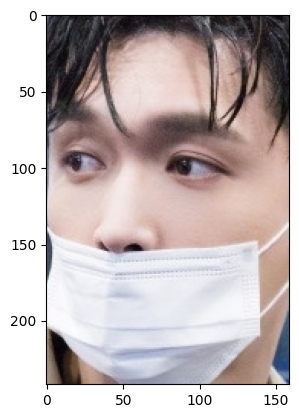

In [6]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1009.jpg')
imgplot = plt.imshow(img)
plt.show()

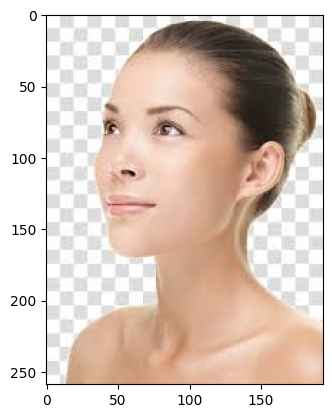

In [7]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [8]:
# convert to numpy array and resizing images

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
len(data)

7553

In [10]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [11]:
data[0].shape

(128, 128, 3)

In [12]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [13]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [14]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train, Test, Split**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [17]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [18]:
X_train[0][0][0], X_train_scaled[0][0][0], X_test_scaled[0][0][0]

(array([48, 48, 60], dtype=uint8),
 array([0.18823529, 0.18823529, 0.23529412]),
 array([0.97254902, 0.97254902, 0.97254902]))

**Building CNN**

In [19]:
import tensorflow as tf
from tensorflow import keras

2024-04-08 08:44:49.425362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 08:44:49.425461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 08:44:49.543889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2, activation = 'sigmoid'))


In [21]:
#compiling
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [22]:
#training
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5


I0000 00:00:1712565907.826871      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


170/170 [==============================] - 8s 17ms/step - loss: 0.7175 - acc: 0.6213 - val_loss: 0.4427 - val_acc: 0.8645
Epoch 2/5
170/170 [==============================] - 2s 12ms/step - loss: 0.4933 - acc: 0.7762 - val_loss: 0.2507 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 2s 12ms/step - loss: 0.3492 - acc: 0.8556 - val_loss: 0.2855 - val_acc: 0.8777
Epoch 4/5
170/170 [==============================] - 2s 12ms/step - loss: 0.3342 - acc: 0.8565 - val_loss: 0.2560 - val_acc: 0.8876
Epoch 5/5
170/170 [==============================] - 2s 12ms/step - loss: 0.2866 - acc: 0.8770 - val_loss: 0.1912 - val_acc: 0.9140


In [23]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('accuracy : ',accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2456 - acc: 0.8895
accuracy :  0.8894771933555603


In [24]:
type(history)

keras.src.callbacks.History

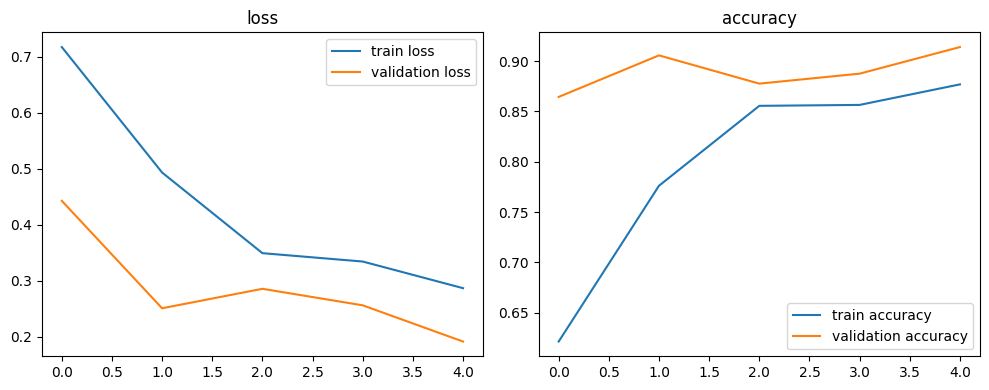

In [25]:
#plotting the loss and accuracy
h = history
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(h.history['loss'], label = 'train loss')
axs[0].plot(h.history['val_loss'], label = 'validation loss')
axs[0].legend()
axs[0].set_title('loss')

axs[1].plot(h.history['acc'], label = 'train accuracy')
axs[1].plot(h.history['val_acc'], label = 'validation accuracy')
axs[1].legend()
axs[1].set_title('accuracy')

plt.tight_layout()
plt.show()

**Predicting**

In [26]:
def checkMask(input_image_path: str):
    input_image = cv2.imread(input_image_path)

    img = mpimg.imread(input_image_path)
    imgplot = plt.imshow(img)
    plt.show()

    input_image_resized = cv2.resize(input_image, (128,128))
    input_image_scaled = input_image_resized/255
    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    if input_pred_label == 1:
      print('The person in the image is wearing a mask')
    else:
      print('The person in the image is not wearing a mask')

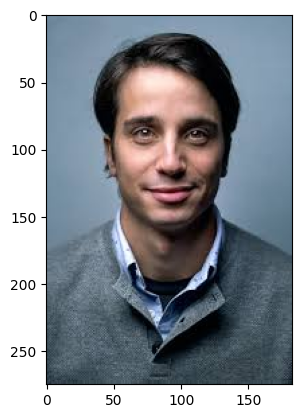

1/1 [==============================] - 0s 311ms/step
[[0.46160483 0.61009187]]
1
The person in the image is wearing a mask


In [27]:
checkMask('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1005.jpg')

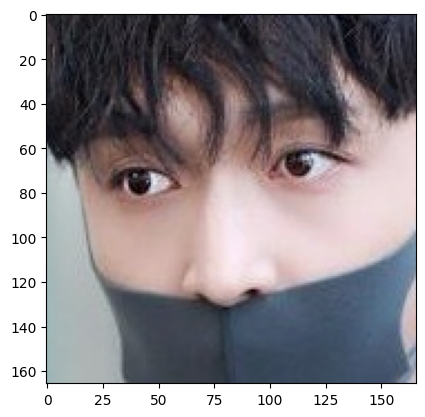

1/1 [==============================] - 0s 20ms/step
[[0.2671563 0.8316987]]
1
The person in the image is wearing a mask


In [28]:
checkMask('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1005.jpg')

**ResNet 50**

In [29]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model pre-trained on ImageNet without the top classification layer
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in resnet.layers:
    layer.trainable = False

# Create a new Sequential model
model = keras.Sequential()

# Add the ResNet50 base model
model.add(resnet)

# Add additional layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))  # Output layer with 2 classes

# Print model summary
model.summary()


94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                       

In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_scaled, Y_train,
                    epochs=10,
                    validation_data=(X_test_scaled, Y_test))


Epoch 1/10
189/189 [==============================] - 14s 49ms/step - loss: 0.7196 - accuracy: 0.5017 - val_loss: 0.6930 - val_accuracy: 0.5089
Epoch 2/10
189/189 [==============================] - 6s 31ms/step - loss: 0.6933 - accuracy: 0.5093 - val_loss: 0.6931 - val_accuracy: 0.5083
Epoch 3/10
189/189 [==============================] - 6s 31ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5083
Epoch 4/10
189/189 [==============================] - 6s 31ms/step - loss: 0.6932 - accuracy: 0.5065 - val_loss: 0.6930 - val_accuracy: 0.5083
Epoch 5/10
189/189 [==============================] - 6s 31ms/step - loss: 0.6931 - accuracy: 0.5065 - val_loss: 0.6930 - val_accuracy: 0.5083
Epoch 6/10
189/189 [==============================] - 6s 31ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6930 - val_accuracy: 0.5083
Epoch 7/10
189/189 [==============================] - 6s 31ms/step - loss: 0.6932 - accuracy: 0.5065 - val_loss: 0.6930 - val_accuracy: 0.508

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('accuracy : ',accuracy)

48/48 [==============================] - 1s 24ms/step - loss: 0.6930 - accuracy: 0.5083
accuracy :  0.508272647857666


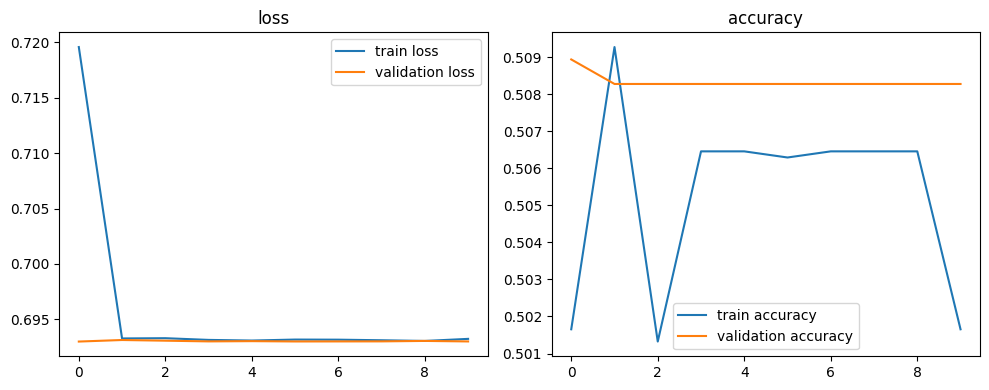

In [32]:
#plotting the loss and accuracy
h = history
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(h.history['loss'], label = 'train loss')
axs[0].plot(h.history['val_loss'], label = 'validation loss')
axs[0].legend()
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'], label = 'train accuracy')
axs[1].plot(h.history['val_accuracy'], label = 'validation accuracy')
axs[1].legend()
axs[1].set_title('accuracy')

plt.tight_layout()
plt.show()

**VGG19**

In [33]:
from tensorflow.keras.applications import VGG19

# Load the VGG19 model pre-trained on ImageNet
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in vgg19.layers:
    layer.trainable = False

# Create a new Sequential model
model = keras.Sequential()

# Add the VGG19 base model
model.add(vgg19)

# Add additional layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))  # Output layer with 2 classes

# Print model summary
model.summary()


80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                       

In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_scaled, Y_train,
                    epochs=10,
                    validation_data=(X_test_scaled, Y_test))


Epoch 1/10
189/189 [==============================] - 13s 53ms/step - loss: 0.4739 - accuracy: 0.7817 - val_loss: 1816.5405 - val_accuracy: 0.9100
Epoch 2/10
189/189 [==============================] - 7s 36ms/step - loss: 0.2684 - accuracy: 0.8860 - val_loss: 2615.5093 - val_accuracy: 0.9159
Epoch 3/10
189/189 [==============================] - 7s 36ms/step - loss: 0.2338 - accuracy: 0.9007 - val_loss: 2061.8340 - val_accuracy: 0.9345
Epoch 4/10
189/189 [==============================] - 7s 36ms/step - loss: 0.2064 - accuracy: 0.9154 - val_loss: 2595.9832 - val_accuracy: 0.9385
Epoch 5/10
189/189 [==============================] - 7s 36ms/step - loss: 0.1868 - accuracy: 0.9219 - val_loss: 2950.4863 - val_accuracy: 0.9332
Epoch 6/10
189/189 [==============================] - 7s 36ms/step - loss: 0.1636 - accuracy: 0.9345 - val_loss: 1827.1825 - val_accuracy: 0.9292
Epoch 7/10
189/189 [==============================] - 7s 36ms/step - loss: 0.1674 - accuracy: 0.9230 - val_loss: 4206.5801 

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('accuracy : ',accuracy)

48/48 [==============================] - 1s 28ms/step - loss: 2044.7366 - accuracy: 0.9332
accuracy :  0.9331568479537964


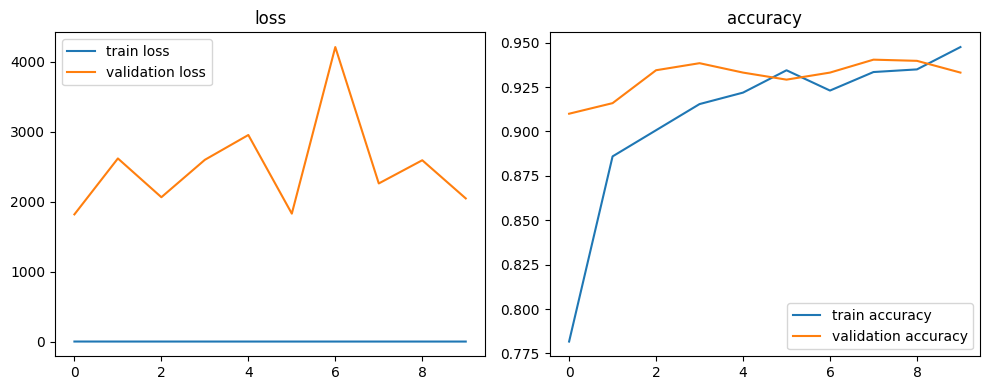

In [36]:
#plotting the loss and accuracy
h = history
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(h.history['loss'], label = 'train loss')
axs[0].plot(h.history['val_loss'], label = 'validation loss')
axs[0].legend()
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'], label = 'train accuracy')
axs[1].plot(h.history['val_accuracy'], label = 'validation accuracy')
axs[1].legend()
axs[1].set_title('accuracy')

plt.tight_layout()
plt.show()

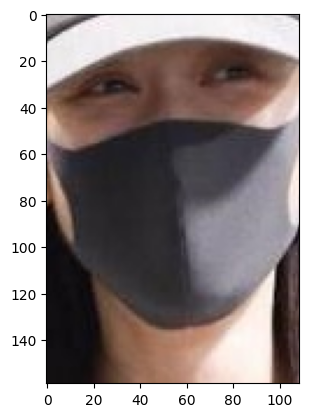

1/1 [==============================] - 1s 510ms/step
[[0. 1.]]
1
The person in the image is wearing a mask


In [37]:
checkMask('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1007.jpg')